# Градиентный спуск

Градиентный спуск - это один из самых популярных алгоритмов, используемых внутри машинного обучения. При этом все мы, обучая ту или иную модель машинного оубчения используем различнии вариации градиентного спуска, практически не задумываясь.

![alt text](https://drive.google.com/uc?id=1q8hjDVEtEWD3CTjKK66oMO8-_ctICEEg)

Рассмотрим простые примеры и более сложное описание градиентного спуска, чтобы понять, как он работает.

## Упрощённый пример поиска максимума через расчёт значения производной для одномерной функции

**Метод градиентного спуска** для одной переменной это метод оптимизации функции.

**Оптимизация** в математике, информатике и исследовании операций - это задача нахождения экстремума (минимума или максимума) целевой функции в некоторой области конечномерного векторного пространства, ограниченной набором линейных и/или нелинейных равенств и/или неравенств.

### Теория

Предположим, что нам необходимо добиться перемещения по оси Х в сторону минимума. Для этого можно использовать знание о значении производной функции. Известно, что знак первой производной позволяет определить то, где находится точка минимума. Для этого справа от потенциальной точки минмиума производная должна иметь положительный знак (возрастать), а слева иметь отрицательный знак (убывать).

Но при этом, если мы должны двигаться к минимуму и находимся изначально слева от него, то двигаться нам нужно вправо (+). Аналогично, если находимся слева (-). То есть нам нужно брать производную с обратным знаком.

То есть самую простую формулу для гаридентного спуска можно представить следующим образом. Обращаем внимание, что градиентный спуск - итерационная процедура. То есть он требует последовательного вычисления значений функции в точке.

$ x_{n+1}=x_n - f'(x_n) $

Однако большие значения производных слишком вредят движению (разберём это ниже), чтобы избежать сложностей вводиться поправочный коэффициент $\lambda$

$ x_{n+1}=x_n - \lambda * f'(x_n) $

Этот коэффициент называют скоростью обучения.

### Практическая реализация

Рассмотрим следующие функции, с которыми будем работать в последующих примерах.

$f(x) = x^2-6*x+5$

$\frac{\partial f}{\partial x} = f'(x) = 2*x-6 $

$f_2(x) = x^2 + 15*sin(x)$

$f_2'(x) = 2*x + 15*cos(x) $

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Введём функции для расчёта значений исходных функций и их производных. Сделаем это жёстко, так как рассматриваем только конкретные примеры.

def f(x):
  return x*x - 6*x + 5

def dfdx(x):
  return 2*x - 6

def f2(x):
  return x*x + 15*np.sin(x)

def df2dx(x):
  return 2*x + 15*np.cos(x)

#### Практическая реализация градиентного спуска

In [3]:
# Введём ключевые параметры для работы (их можно изменять в рамках эксперимента)

N = 200 #количество итераций
lr = 1.1 #скорость оптимизации

In [4]:
0.1+0.1+0.1

0.30000000000000004

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: 2.305125096759656e+33 в точке -4.801171832750475e+16


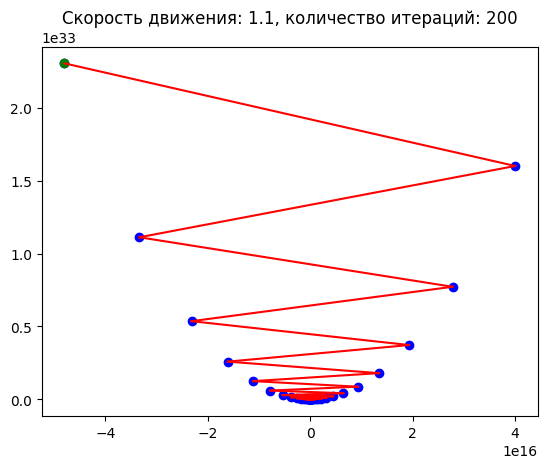

In [ ]:
fig, ax = plt.subplots()
ax.set_title(f'Скорость движения: {lr}, количество итераций: {N}')

x_plot = np.arange(-5, 11, 0.01)
y_plot = [f(x) for x in x_plot]
ax.plot(x_plot, y_plot)

xc = -4 #начальное значение
print(f'Начальное значение минимумума: {f(xc)} в точке {xc}')

ax.scatter(xc, f(xc), c='r')


for _ in range(N):
  x0 = xc #нужно только для графика

  xc = xc - lr*dfdx(xc) #сам по себе градиентный спуск

  ax.scatter(xc, f(xc), c='b') #нужно только для графика
  ax.plot([x0,xc],[f(x0), f(xc)], c='r') #нужно только для графика



print(f'Финальное значение минимумума: {f(xc)} в точке {xc}')

plt.show()

#### Создание функции для расчёта

In [13]:
def gd(N, lr, min = -5, max = 11, f=f, dfdx=dfdx, xc=-4):
    """
    Реализация и визуализация процедуры градиентного спуска
    для конкретной функции в упрощённом примере.

    Parameters
    ----------
    N: integer
        Число шагов градиентного спуска, которые необходимо выполнить.

    lr: float
        Скорость обучения

    min: float
        Минимальное значение, отображаемое на графике

    max: float
        Максимальное значение, отображаемое на графике

    f: function
        Целевая функция

    dfdx: function
        Градиент целевой функции

    Returns
    ----------
    """
    fig, ax = plt.subplots()
    ax.set_title(f'Скорость движения: {lr}, количество итераций: {N}')

    x_plot = np.arange(min, max, 0.01)
    y_plot = [f(x) for x in x_plot]
    ax.plot(x_plot, y_plot)

    print(f'Начальное значение минимумума: {f(xc)} в точке {xc}')

    ax.scatter(xc, f(xc), c='r')

    for _ in range(N):
      x0 = xc #нужно только для графика

      xc = xc - lr*dfdx(xc) #сам по себе градиентный спуск

      ax.scatter(xc, f(xc), c='b') #нужно только для графика
      ax.plot([x0,xc],[f(x0), f(xc)], c='r') #нужно только для графика

    ax.scatter(xc, f(xc), c='g')

    print(f'Финальное значение минимумума: {f(xc)} в точке {xc}')
    plt.show()

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: 45 в точке -4


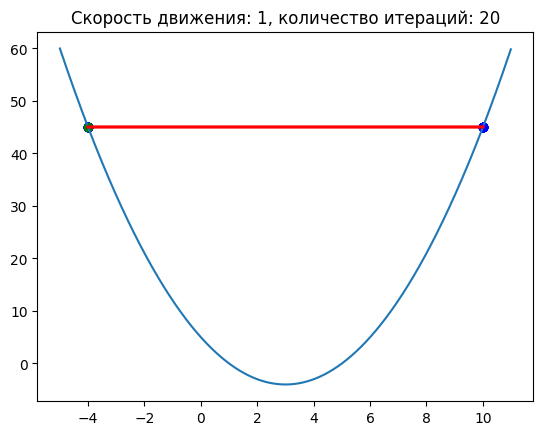

In [14]:
gd(20, 1, min=-5, max = 11)

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9934867828206553 в точке 2.919295494677521


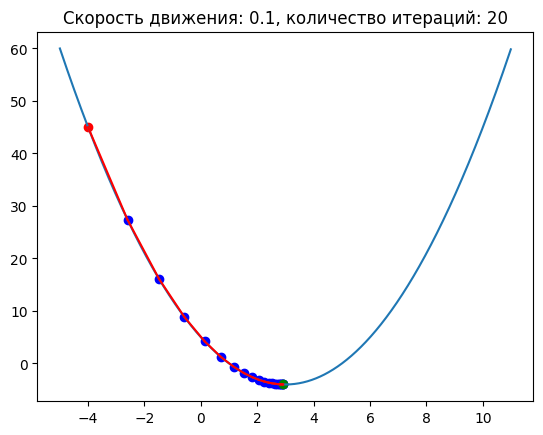

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9999999344992787 в точке 2.9997440689091954


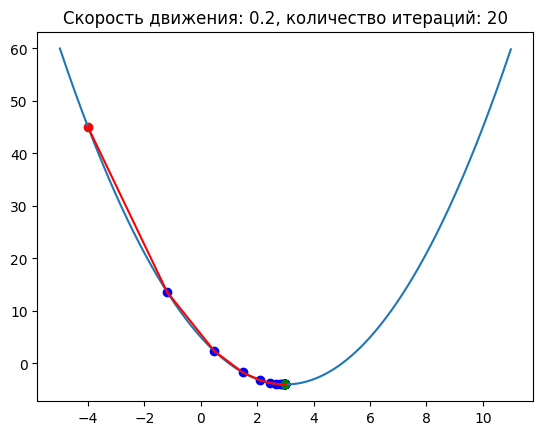

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9999999999999964 в точке 2.999999923034186


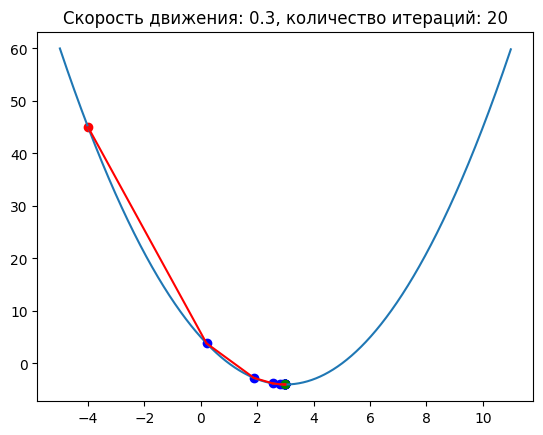

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9999999999999982 в точке 2.9999999999999267


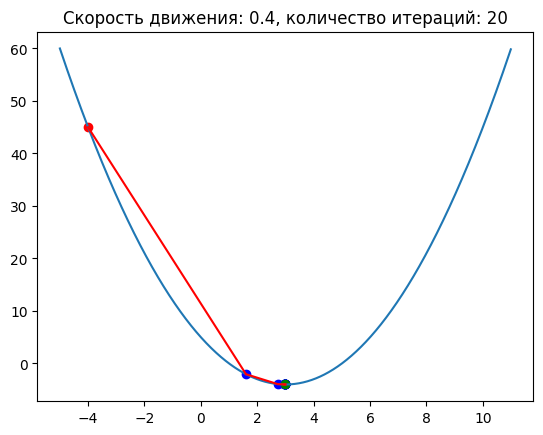

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -4.0 в точке 3.0


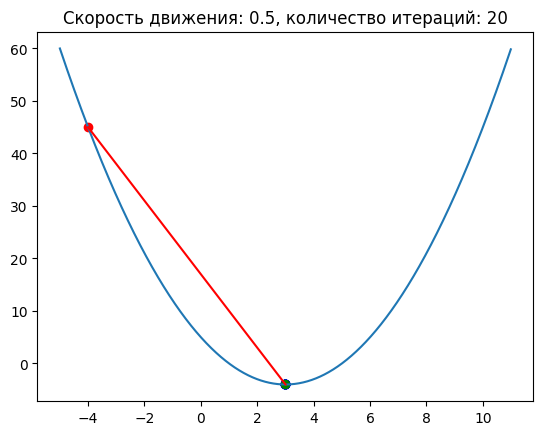

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9999999999999982 в точке 2.9999999999999267


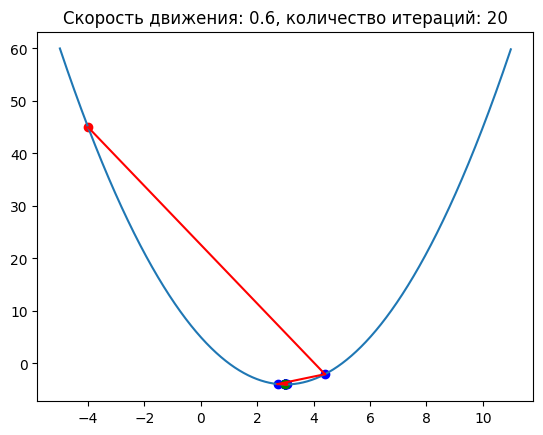

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9999999999999964 в точке 2.999999923034186


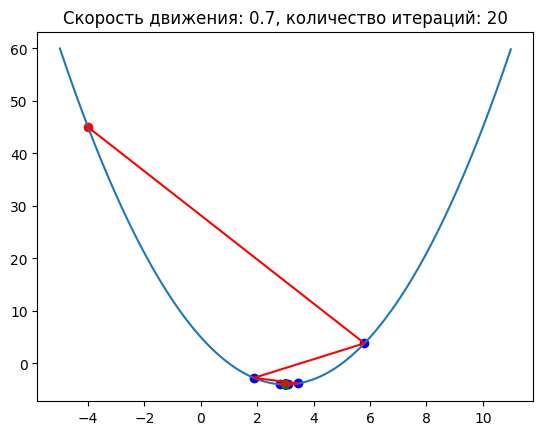

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9999999344992787 в точке 2.9997440689091954


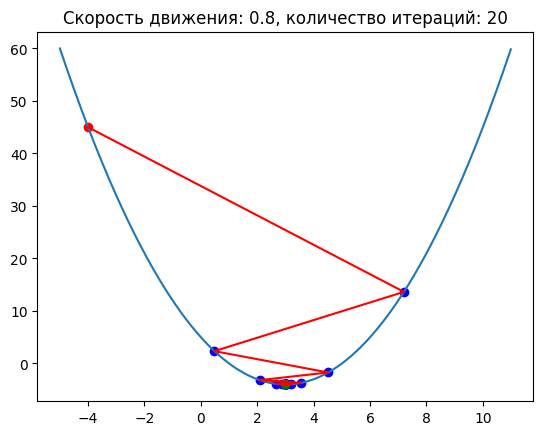

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: -3.9934867828206553 в точке 2.9192954946775207


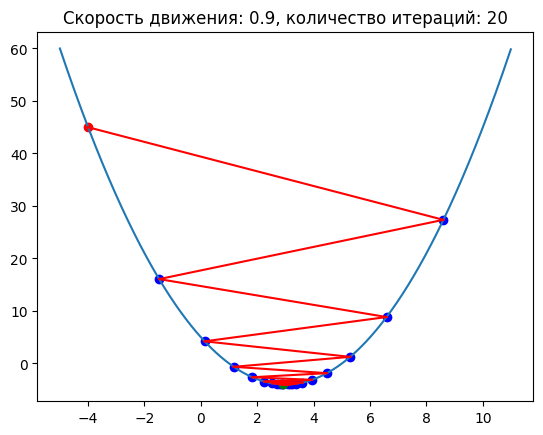

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: 45.0 в точке -4.0


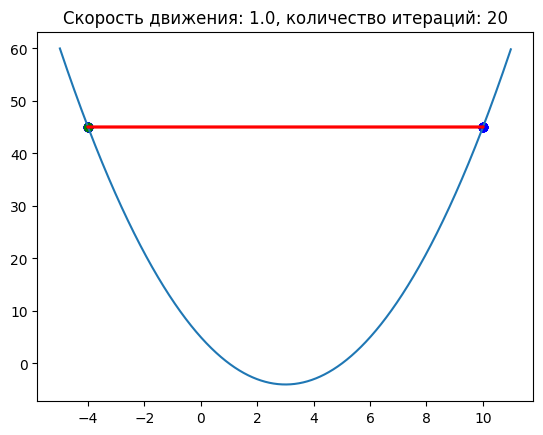

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: 72014.80683048563 в точке -265.363199471324


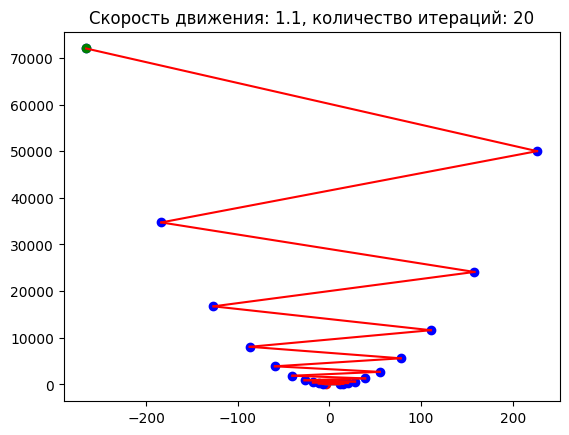

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: 34301843.132962346 в точке -5853.777879769929


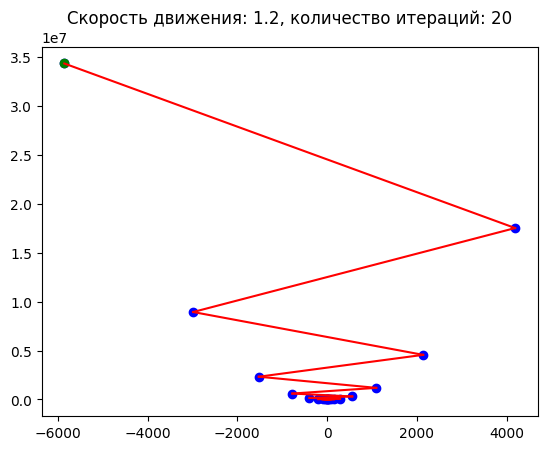

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: 7161358018.921442 в точке -84621.80737302414


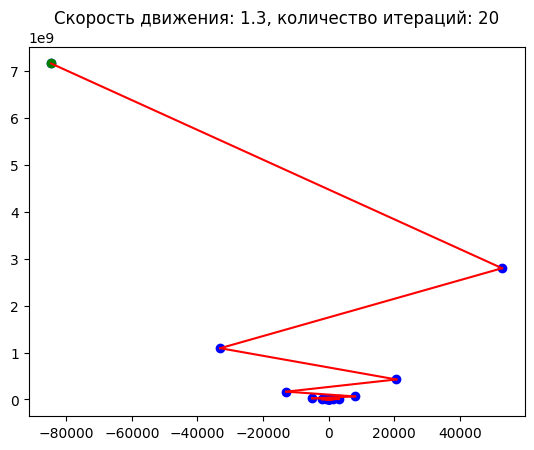

Начальное значение минимумума: 45 в точке -4
Финальное значение минимумума: 796335880478.2562 в точке -892373.5351477235


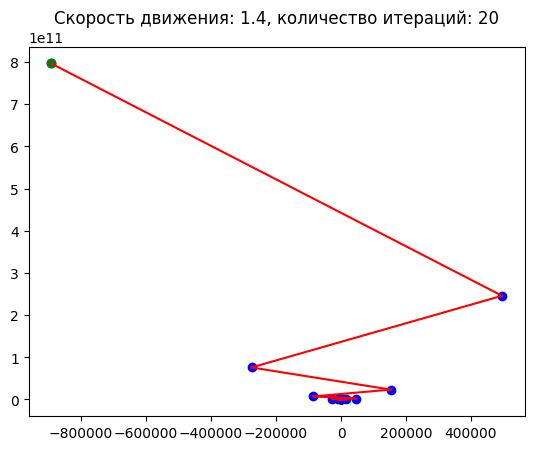

In [16]:
# можно повести анализ влияния скорости обучения на результат оптимизации

for i in range(1, 15):
  gd(20, i/10)

#### Сложности оптимизации (локальные минимумы)

От точки, в которой вы начинается работу градиентного спуска зависит достаточно много в случае работы с теми функциями, которые имеют различные локальные и глобальные минимумым. Ниже приведён пример влияния точки старта на результат обучения.

Начальное значение минимумума: 91.83968333665945 в точке 10
Финальное значение минимумума: 4.529631081084053 в точке 4.129334334768743


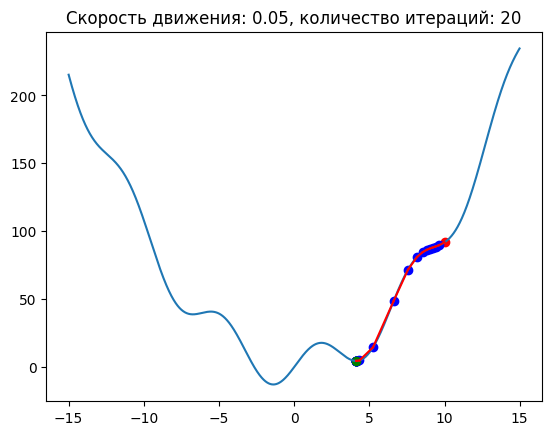

In [9]:
gd(20, 0.05, min=-15, max= 15, f=f2, dfdx=df2dx, xc=10)

Начальное значение минимумума: 39.38386411994708 в точке -5
Финальное значение минимумума: -12.823616841551932 в точке -1.3851303718795267


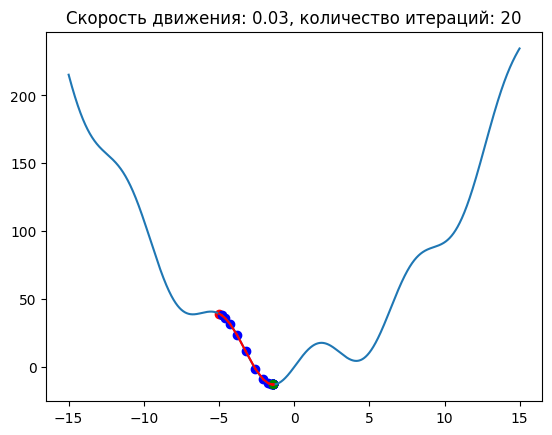

In [10]:
gd(20, 0.03, min=-15, max= 15, f=f2, dfdx=df2dx, xc=-5)

## Градиентный спуск в машинном обучении

Рассмотрим и введнём более строгую постановку задачи подбора значений целевой функции с использованием метода градиентного спуска.

Введём целевую функцию $h_{\theta}(x)$. Эта функция зависит от параметров (определённых значений) ${\theta}$. Для поиска зависимости можно использовать набор данных $(x^{(i)}, y^{(i)})$. Наша задача найти оптимальные значения параметров ${\theta}$, при которых значение функции $h_{\theta}(x)$ будет максимально близко к значениям $y^{(i)}$ из заданного набора данных.

${x^{(i)}}$ называют вектором признаков. ${y^{(i)}}$  называют вектором значений целевой переменной.

Для решения поставленной задачи необходимо ввести "функцию потерь", то есть такую функцию, которая будет отражать разницу между фактическими значениями {$y^{(i)}$} и расчётными значениями {$h_{\theta}(x^{i})$} или {$h(\theta)^i$}.

Чтобы такая функция могла использоваться в градиентном спуске она должна быть непрерывна и дифференцируема (то есть у неё должна существовать производная в каждой точке). Распространённой функцией потерь является кадратичная функция потерь. Функция потерь рассчитывается для всей выборки.

__Функция потерь:__ (с учётом поправочного коэффициента, выводимого из основ математической статистики) $$J(\theta) = \frac {1}{2m} \sum_{i=1}^{m} (h(\theta)^i - y^i)^2$$

__Градиентный спуск__ - это способ минимизировать некоторую функцию потерь $J(\theta)$, которая зависит от параметров $\theta$, путем обновления параметров в "направлении", противоположном градиенту целевой функции $\nabla_{\theta}J(\theta)$. Скорость обучения $\eta$ определяет размер шагов обновления, предпринимаемых для достижения минимума.

**Метафора** для происходящего процесса: "Мы следуем по направлению наклона поверхности, созданной целевой функцией, под гору, пока не достигнем долину".

Под градиентом понимается вектор, состоящий из частных производных некоторой функции. Например для функции: $$ f(x, y) = x^2+y^3 $$ вектор частных производных, градиент, будет вглядеть следующим образом $$ (\frac{\partial{f(x, y)}}{\partial{x}} , \frac{\partial{f(x, y)}}{\partial{y}}) = (2x, 3y^2)  $$

__Градиент функции потерь:__ $$\frac{\partial{J(\theta)}}{\partial{\theta_i}} = \frac {1}{m} \sum_{i=1}^{m} (h(\theta^i) - y^i) X_j^i$$

__Если__ зависимость в данных __линейная__ и может быть описана уравнением:

$$h_\theta(x) = \theta_0 + \theta_1X$$, то параметры будут меняться следующим образом на каждом шаге:

$$\theta_0 = \theta_0 - \eta (\frac {1}{m}\sum_{i=1}^{m}((h(\theta^i) - y^i)X_0^i))$$

$$\theta_1 = \theta_1 - \eta (\frac {1}{m}\sum_{i=1}^{m}((h(\theta^i) - y^i)X_1^i))$$

Начальные значения вектора $(\theta_0, \theta_1)$ обычно определяются случайно. Процедура останавливается когда значения параметров перестают изменяться.

In [11]:
from copy import deepcopy # лучший модуль для обепечения реального копирования объектов
from tqdm import tqdm # библиотека для создания шкалы прогресса итерационного процесса

import seaborn
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tqdm'

In [ ]:
std_error = 30 # коэффиеицнт который нужен для генерации случайных данных в разбросе
sample_size = 10000 # размер выборки
theta0, theta1 = 1, 10 # параметры функции, описанной выше

x = np.random.randn(sample_size) # генерация случайноый выборки
func_y = lambda x: theta0 + theta1 * x # лямбда-функция для расчёта значений функции
# def func_y(x):
#     return theta0 + theta1 * x
y = func_y(x) + std_error * np.random.randn(sample_size) # расчёт значенйи выборки с учётом случайного разброса

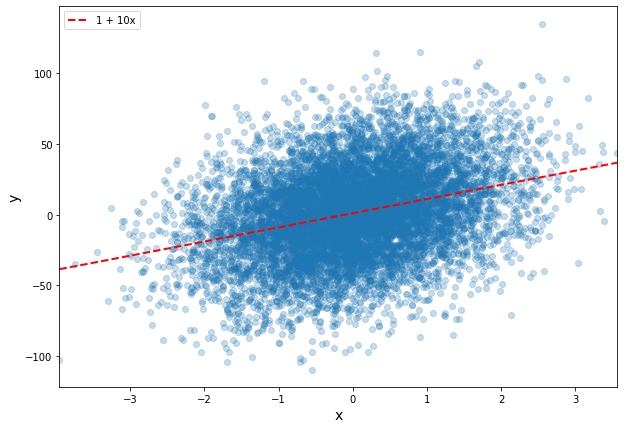

In [ ]:
# визуализируем полученные выборки

x_plot = np.linspace(x.min(), x.max(), 1000)
y_plot = func_y(x_plot)

fig = plt.figure(figsize=(10, 7))
plt.scatter(x, y, alpha=0.25)
plt.plot(x_plot, y_plot, "r--", linewidth=2, label=f"{theta0} + {theta1}x")
plt.xlim(x.min(), x.max())
plt.xlabel("x", size=14)
plt.ylabel("y", size=14)
plt.legend(loc="best")

plt.show()

In [ ]:
def calculate_predictions(theta0, theta1, X):
    """
    Вычисление значения функции для заданных коэфициентов и значений X.

    Parameters
    ----------
    theta0: float
        Значение параметра theta0.

    theta1: float
        Значение параметра theta1.

    X: array-like, shape = [n_samples, ]
        Вектор признаков.

    Returns
    -------
    y_pred: array-like, shape = [n_samples, ]
        Поученное значение функции.

    """
    return theta0 + theta1*X


def calculate_cost(theta0, theta1, X, y):
    """
    Вычисление значения функции потерь.

    Parameters
    ----------
    theta0: float
        Значение параметра theta0.

    theta1: float
        Значение параметра theta1.

    X: array-like, shape = [n_samples, n_features]
        Вектор признаков.

    y: array-like, shape = [n_samples, ]
        Вектор целевой переменной.

    Returns
    -------
    cost: float
        Значение функции потерь.

    """
    theta0 = np.atleast_3d(np.asarray(theta0)) # перевод значений коэффициентов в удобный для работы программы вид
    theta1 = np.atleast_3d(np.asarray(theta1))

    y_pred = calculate_predictions(theta0, theta1, X)
    cost = np.average((y - y_pred)**2, axis=2)/2

    return cost


def gradient_descent_step(theta, X, y, learning_rate):
    """
    Один шаг градиетного спуска.

    Parameters
    ----------
    theta: array-like
        Массив значений параметров theta.

    X: array-like, shape = [n_samples, n_features]
        Вектор признаков.

    y: array-like, shape = [n_samples, ]
        Вектор целевой переменной.

    learning_rate: float
        Скорость обучения.

    Returns
    -------
    updated_theta: array-like
        Обновленный массив значений параметров theta.

    """
    n = len(y)
    y_pred = calculate_predictions(theta[0], theta[1], X)

    updated_theta = deepcopy(theta)
    updated_theta[0] -= learning_rate / n * np.sum((y_pred - y))
    updated_theta[1] -= learning_rate / n * np.sum((y_pred - y) * X)

    return updated_theta

In [ ]:
def plot_gradient_descent(cost_history, theta_history, X, y):
    """
    Визуализация процесса и результата градиетного спуска.
    Осуществляется построения четырех графиков, на первом графике
    отображена зависимость значения функции потерь на каждой
    итерации обучения, на втором графике отображена зависимость
    значений параметров theta от итерации обучения, на
    третьем графике отображен процесс изменения результатов расчёта
    параметров получаемой прямой, на четвертом графике
    отображены линии уровня и процесс градиетного спуска.

    Parameters
    ----------
    cost_history: list[float]
        Список со значениями функции потерь на каждой
        итерации обучения.

    theta_history: list[np.array]
        Список двумерных массивов со значением параметров theta.

    X: array-like, shape = [n_samples, n_features]
        Вектор признаков.

    y: array-like, shape = [n_samples, ]
        Вектор целевой переменной.

    """
    fig = plt.figure(figsize=(15, 15))
    plt.subplot(221)
    plt.scatter(range(len(cost_history)), cost_history)
    plt.xlabel("число итераций", size=14)
    plt.ylabel(r"J($\theta$)", size=14)

    plt.subplot(223)
    plt.scatter(x, y, alpha=0.15)
    x_plot = np.linspace(-3, 3, 500)
    for num, theta in enumerate(theta_history):
        y_plot = calculate_predictions(theta[0], theta[1], x_plot)
        if num == 0:
            plt.plot(x_plot, y_plot, color="green", label="Стартовая линия - baseline", linewidth=5)
        if num == len(theta_history) - 1:
            plt.plot(x_plot, y_plot, color="orange", label="Реузльтат работы", linewidth=5)
        else:
            plt.plot(x_plot, y_plot, "r--", alpha=.5)
    plt.xlim(x_plot.min(), x_plot.max())
    plt.xlabel("x", size=14)
    plt.ylabel("y", size=14)
    plt.plot(x_plot, func_y(x_plot), color = "black", label="Исходная линия", linewidth=3)
    plt.legend(loc="best")

    plt.subplot(222)
    x_plot = range(len(cost_history)+1)
    plt.scatter(x_plot, [theta[0] for theta in theta_history], label=r'$\theta_0$')
    plt.scatter(x_plot, [theta[1] for theta in theta_history], label=r'$\theta_1$')
    plt.xlabel("число итераций", size=14)
    plt.ylabel(r"$\theta$", size=14)
    plt.legend(loc="best")
    plt.subplot(224)
    plot_cost_function(X, y, theta_history)


def plot_cost_function(X, y, theta_history):
    """
    Визуализация процесса градиетного спуска и
    построение линий уровня.

    Parameters
    ----------
    X: array-like, shape = [n_samples, n_features]
        Вектор признаков.

    y: array-like, shape = [n_samples, ]
        Вектор целевой переменной.

    theta_history: list[np.array]
        Список двумерных массивов со значением параметров theta.

    """
    theta0 = [theta[0] for theta in theta_history]
    theta1 = [theta[1] for theta in theta_history]

    #theta0_grid = np.linspace(-5*min(theta0), max(theta0), 200)
    #theta1_grid = np.linspace(-5*min(theta1), max(theta1), 200)
    theta0_grid = np.linspace(-25, 25, 200)
    theta1_grid = np.linspace(-25, 25, 200)
    cost_grid = calculate_cost(
        theta0_grid[np.newaxis,:,np.newaxis],
        theta1_grid[:,np.newaxis,np.newaxis],
        X, y
    )
    X, Y = np.meshgrid(theta0_grid, theta1_grid)

    theta0, theta1 = theta_history[-1]
    plt.scatter([theta0]*2, [theta1]*2, s=[50, 0], color=['k','w'])
    contours = plt.contour(X, Y, cost_grid, 30)
    plt.clabel(contours)

    for it in range(1, len(theta_history)):
        plt.annotate(
            '', xy=theta_history[it], xytext=theta_history[it-1],
            arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 2},
            va='center', ha='center'
        )

    plt.scatter(*zip(*theta_history), color="black", s=40, lw=0)
    plt.xlim(theta0_grid.min(), theta0_grid.max())
    plt.ylim(theta1_grid.min(), theta1_grid.max())
    plt.xlabel(r'$\theta_0$', size=15)
    plt.ylabel(r'$\theta_1$', size=15)
    plt.title('Функция потерь', size=15)

In [ ]:
n_iterations, learning_rate = 100, 0.5
theta_history, cost_history = [100*np.random.rand(2)], []

for it in tqdm(range(n_iterations)):
    last_theta = theta_history[-1]
    current_theta = gradient_descent_step(
        theta=last_theta, X=x, y=y, learning_rate=learning_rate
    )
    theta_history.append(current_theta)
    cost_history.append(calculate_cost(current_theta[0], current_theta[1], X=x, y=y))

100%|██████████| 100/100 [00:00<00:00, 5976.84it/s]


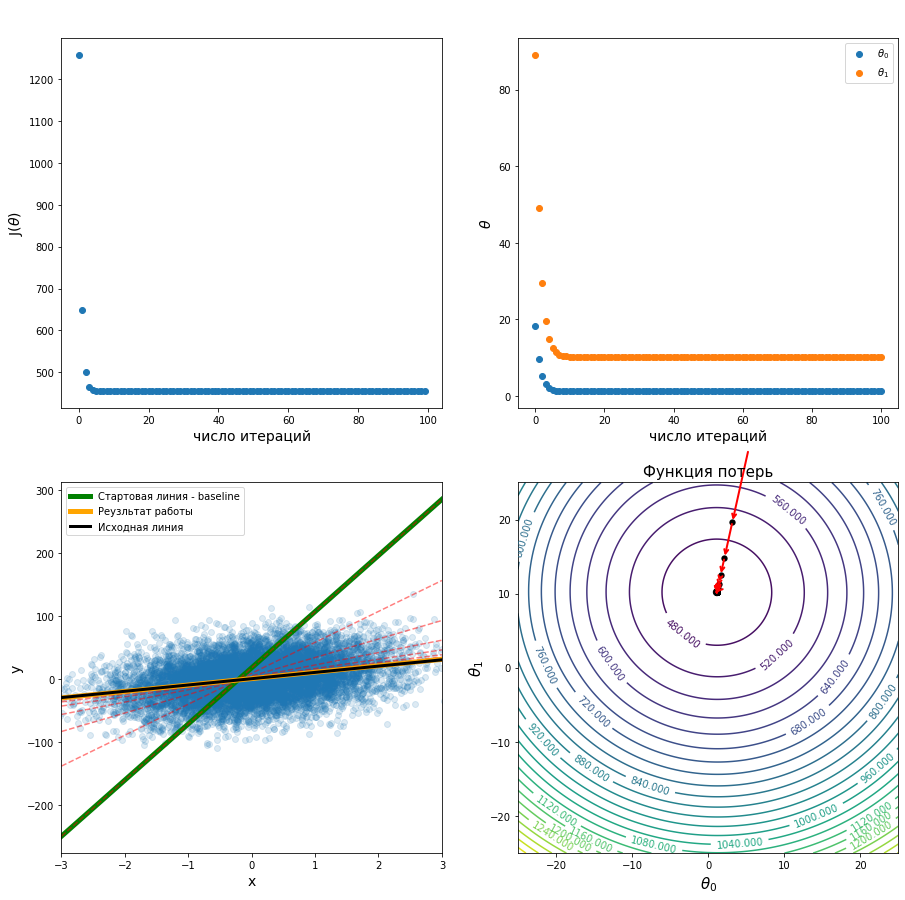

In [ ]:
plot_gradient_descent(
    cost_history=cost_history,
    theta_history=theta_history,
    X=x, y=y
)